## Movies Ratings Dataset
This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

### Importing libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

### Uploading dataset

In [72]:
data = pd.read_csv("ratings.csv")
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Analysing dataset

In [70]:
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")
print(f"There are {len(data.userId.unique())} users in dataset")
print(f"There are {len(data.movieId.unique())} movies in dataset")
print(f"There are {pd.Series(data.userId.isna()).sum()} userId with NaN values") 
print(f"There are {pd.Series(data.userId.isnull()).sum()} userId with null values")

Dataset has 100836 rows and 4 columns
There are 610 users in dataset
There are 9724 movies in dataset
There are 0 userId with NaN values
There are 0 userId with null values


### Preparing dataset
In order to create a clustering model for movie users, it is necessary to transform original dataset into a new matrix (userId, movieId) which will have a size of (610,9724). The values that will populate new matrix are ratings from original dataset.

In [59]:
new_data = pd.DataFrame(columns=data["movieId"].unique())

In [60]:
new_data.head()

,1,3,6,47,50,70,101,110,151,157,163,216,223,231,235,260,296,316,333,349,356,362,367,423,441,457,480,500,527,543,552,553,590,592,593,596,608,648,661,673,...,113565,113780,113862,114044,114670,114707,115727,117867,118082,128838,129313,130050,130052,130840,133832,135534,135803,135815,138610,138632,139511,139655,140267,141400,141799,142366,142598,145951,146309,147657,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981


In [64]:
new_data["userId"] = data["userId"].unique()

In [65]:
new_data.head()

,1,3,6,47,50,70,101,110,151,157,163,216,223,231,235,260,296,316,333,349,356,362,367,423,441,457,480,500,527,543,552,553,590,592,593,596,608,648,661,673,...,113780,113862,114044,114670,114707,115727,117867,118082,128838,129313,130050,130052,130840,133832,135534,135803,135815,138610,138632,139511,139655,140267,141400,141799,142366,142598,145951,146309,147657,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981,userId
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [74]:
new_data = new_data.fillna(0)
new_data.head()

,1,3,6,47,50,70,101,110,151,157,163,216,223,231,235,260,296,316,333,349,356,362,367,423,441,457,480,500,527,543,552,553,590,592,593,596,608,648,661,673,...,113780,113862,114044,114670,114707,115727,117867,118082,128838,129313,130050,130052,130840,133832,135534,135803,135815,138610,138632,139511,139655,140267,141400,141799,142366,142598,145951,146309,147657,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981,userId
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


The following For Loop will populate new_data using ratings for each userId and movieId from original dataset. It will take several minutes!!

In [76]:
j = 0
for user_id in new_data["userId"]:
  for i in range(data.shape[0]):
    if data["userId"][i] == user_id:
      new_data[data["movieId"][i]][j] = data["rating"][i]
  j += 1

In [ ]:
data_2 = pd.read_csv("ratings_df_2.csv")

In [77]:
new_data.head()

,1,3,6,47,50,70,101,110,151,157,163,216,223,231,235,260,296,316,333,349,356,362,367,423,441,457,480,500,527,543,552,553,590,592,593,596,608,648,661,673,...,113780,113862,114044,114670,114707,115727,117867,118082,128838,129313,130050,130052,130840,133832,135534,135803,135815,138610,138632,139511,139655,140267,141400,141799,142366,142598,145951,146309,147657,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981,userId
0,4,4,4,5,5,3,5,4,5,5,5,5,3,5,4,5,3,3,5,4,4,5,4,3,4,5,4,3,5,4,4,5,4,4,4,5,5,3,5,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,5,1,0,0,0,0,0,0,0,1,5,0,0,0,0,0,2,0,0,5,0,5,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,4,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,5,2,0,3,0,0,4,0,0,4,0,0,5,0,0,0,5,3,0,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [80]:
data_2 = new_data.drop(['userId'],axis=1)
data_2.head()

,1,3,6,47,50,70,101,110,151,157,163,216,223,231,235,260,296,316,333,349,356,362,367,423,441,457,480,500,527,543,552,553,590,592,593,596,608,648,661,673,...,113565,113780,113862,114044,114670,114707,115727,117867,118082,128838,129313,130050,130052,130840,133832,135534,135803,135815,138610,138632,139511,139655,140267,141400,141799,142366,142598,145951,146309,147657,147662,148166,149011,152372,158721,160341,160527,160836,163937,163981
0,4,4,4,5,5,3,5,4,5,5,5,5,3,5,4,5,3,3,5,4,4,5,4,3,4,5,4,3,5,4,4,5,4,4,4,5,5,3,5,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,5,1,0,0,0,0,0,0,0,1,5,0,0,0,0,0,2,0,0,5,0,5,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,5,2,0,3,0,0,4,0,0,4,0,0,5,0,0,0,5,3,0,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
data_2.shape

(610, 9724)

Now that data has been populated in a unique matrix, it is necessary to perfom the following steps:
* Normalize data using MinMaxScaler()
* Reduce dimensionality using PCA()

In [82]:
scaled = MinMaxScaler()
data_2_new = scaled.fit_transform(data_2)

Principal Components Analysis is used to identify eigenvectors and eigenvalues. With this technic, data could be explained based on a limited quantity of these vectors and values, instead of using all features. This allows to reduce dimensionality of dataset significantly.

For configuring PCA, the first step is to define number of elements or components to explain the data. This quantity must be the lowest number between rows and features of dataset. In this case, there are 610 rows (data_2.shape[0]) and 9724 features (data_2.shape[1]).

It is highly recommended to try different number of components evaluating the amount of explained variance in the transformed model. The bigger explained variance, the better aproximation.

In [83]:
n_elements = 610
pca = PCA(n_components=n_elements)

In [84]:
pca.fit_transform(data_2_new)

array([[ 3.00361261e+00,  2.66448334e+00, -1.19782125e+00, ...,
         1.49089477e-04, -3.15480444e-04,  2.43173280e-15],
       [-2.06727290e+00, -9.01700371e-01,  6.02284179e-01, ...,
         6.02794883e-03,  5.84158820e-05,  2.43173280e-15],
       [-2.45256167e+00, -7.90442512e-02,  3.18246717e-01, ...,
         1.78927055e-03,  1.26639493e-03,  2.43173280e-15],
       ...,
       [ 9.34617224e+00,  3.89322541e-01, -2.98208709e+00, ...,
         1.16219205e-04, -5.44957779e-04,  2.43173280e-15],
       [-2.13487941e+00,  3.08554118e-01, -7.44123345e-01, ...,
         2.36560798e-03,  8.51380676e-03,  2.43173280e-15],
       [ 1.32203281e+01, -9.77441949e+00,  1.60595790e+00, ...,
         1.73578200e-04, -3.38205859e-04,  2.43173280e-15]])

In [85]:
ratios = pca.explained_variance_ratio_

In [86]:
ratios[0]

0.12153270151908603

In [87]:
ratios_array = []

In [88]:
for i in range(len(ratios)):
  if i == 0:
    ratios_array.append(ratios[i])
  else:  
    ratios_array.append(ratios_array[i-1]+ratios[i])


Text(0, 0.5, 'Explained variance')

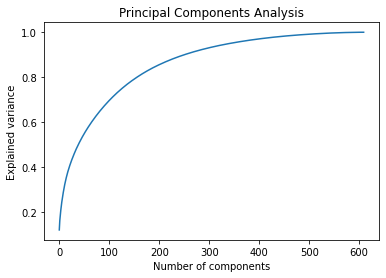

In [89]:
plt.plot(ratios_array)
plt.title("Principal Components Analysis")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

Considering figure above, it can be seen that elbow effect occurs after 300 components.

### Clustering Model using KMeans

In [90]:
n_components = 300
pca = PCA(n_components=n_components)
model_transformed = pca.fit_transform(data_2_new)

In [91]:
model_transformed.shape

(610, 300)

KMeans has an attribute named inertia_ which corresponds to the sum of squared distances of samples to their closest cluster center. The lower inertia, the better model

In [92]:
inertia_array = []
for n_cluster in range(1,model_transformed.shape[0]):
  km = KMeans(n_clusters=n_cluster)
  model = km.fit(model_transformed)
  inertia_array.append(km.inertia_)

Text(0, 0.5, 'Squared distances')

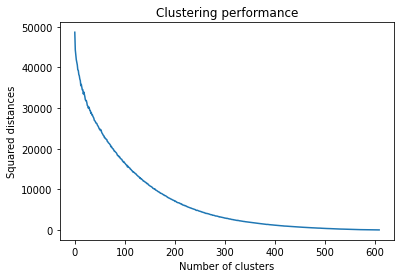

In [93]:
plt.plot(inertia_array)
plt.title("Clustering performance")
plt.xlabel("Number of clusters")
plt.ylabel("Squared distances")

Using elbow consideration, 300 clusters would be a good choice for the model

### Deploying the model as a pipeline

After finding most convenient n_components for PCA and n_clusters for KMeans, a Pipeline model is set

In [94]:
pipe = Pipeline([('scaler',MinMaxScaler()),('pca',PCA(n_components=300)),('km',KMeans(n_clusters=300))])

In [95]:
pipe.fit(data_2)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=300,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('km',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=300, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)